In [12]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity,log_weights_analysis, show_hyperparams, vc_dimension_check,validation_curves,learning_curves
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from HandleClassImbalance.HandleClassImbalance import *
import numpy as np
from sklearn.model_selection import cross_val_predict
from mlpath import mlquest as mlq

### Initialize Model

In [13]:
x_data_d, y_data_d = read_data(kind="Numerical",standardize=True)
clf = BaggingClassifier(estimator=SVC(kernel='rbf', C=3), n_estimators=3, max_samples=0.9, max_features=0.5)
clf.fit(x_data_d, y_data_d)

BaggingClassifier(estimator=SVC(C=3), max_features=0.5, max_samples=0.9,
                  n_estimators=3)

### Hyperparameters

In [14]:
show_hyperparams(clf)

base_estimator,deprecated
bootstrap,True
bootstrap_features,False
estimator__C,3
estimator__break_ties,False
estimator__cache_size,200
estimator__class_weight,None
estimator__coef0,0.0
estimator__decision_function_shape,ovr
estimator__degree,3
estimator__gamma,scale


### Learning Curve

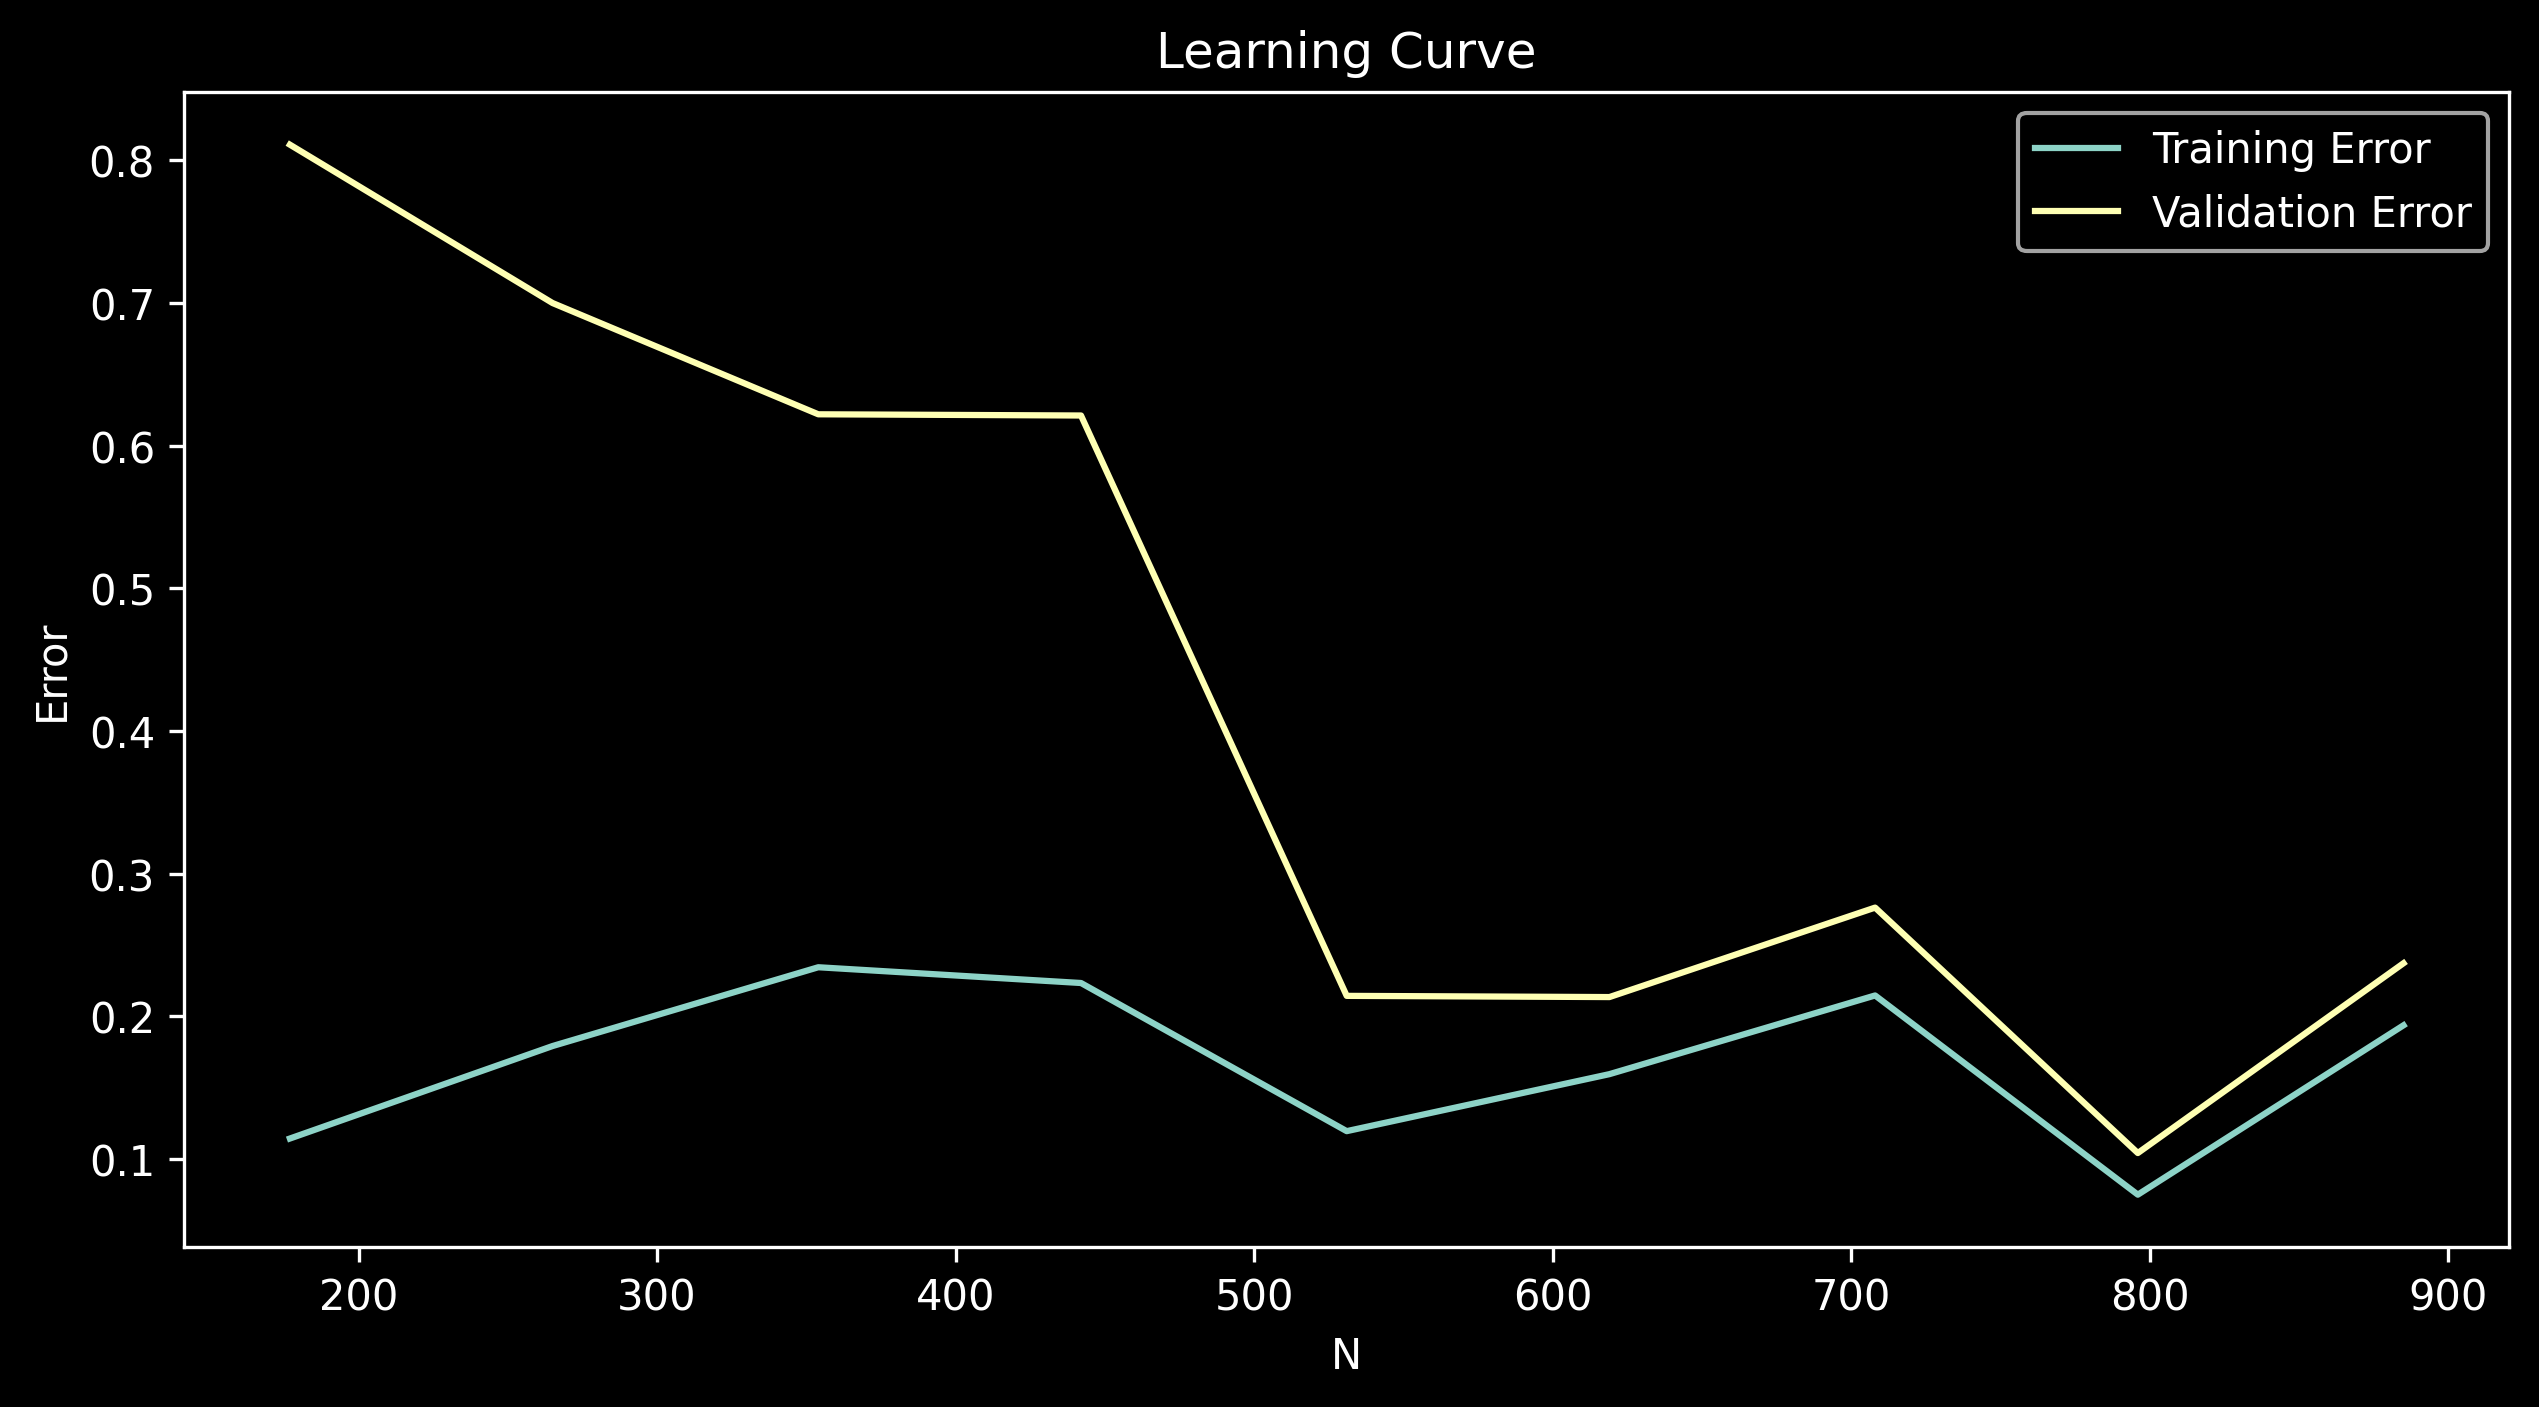

In [15]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4, N=train_sizes)

### Hyperparameter Curve

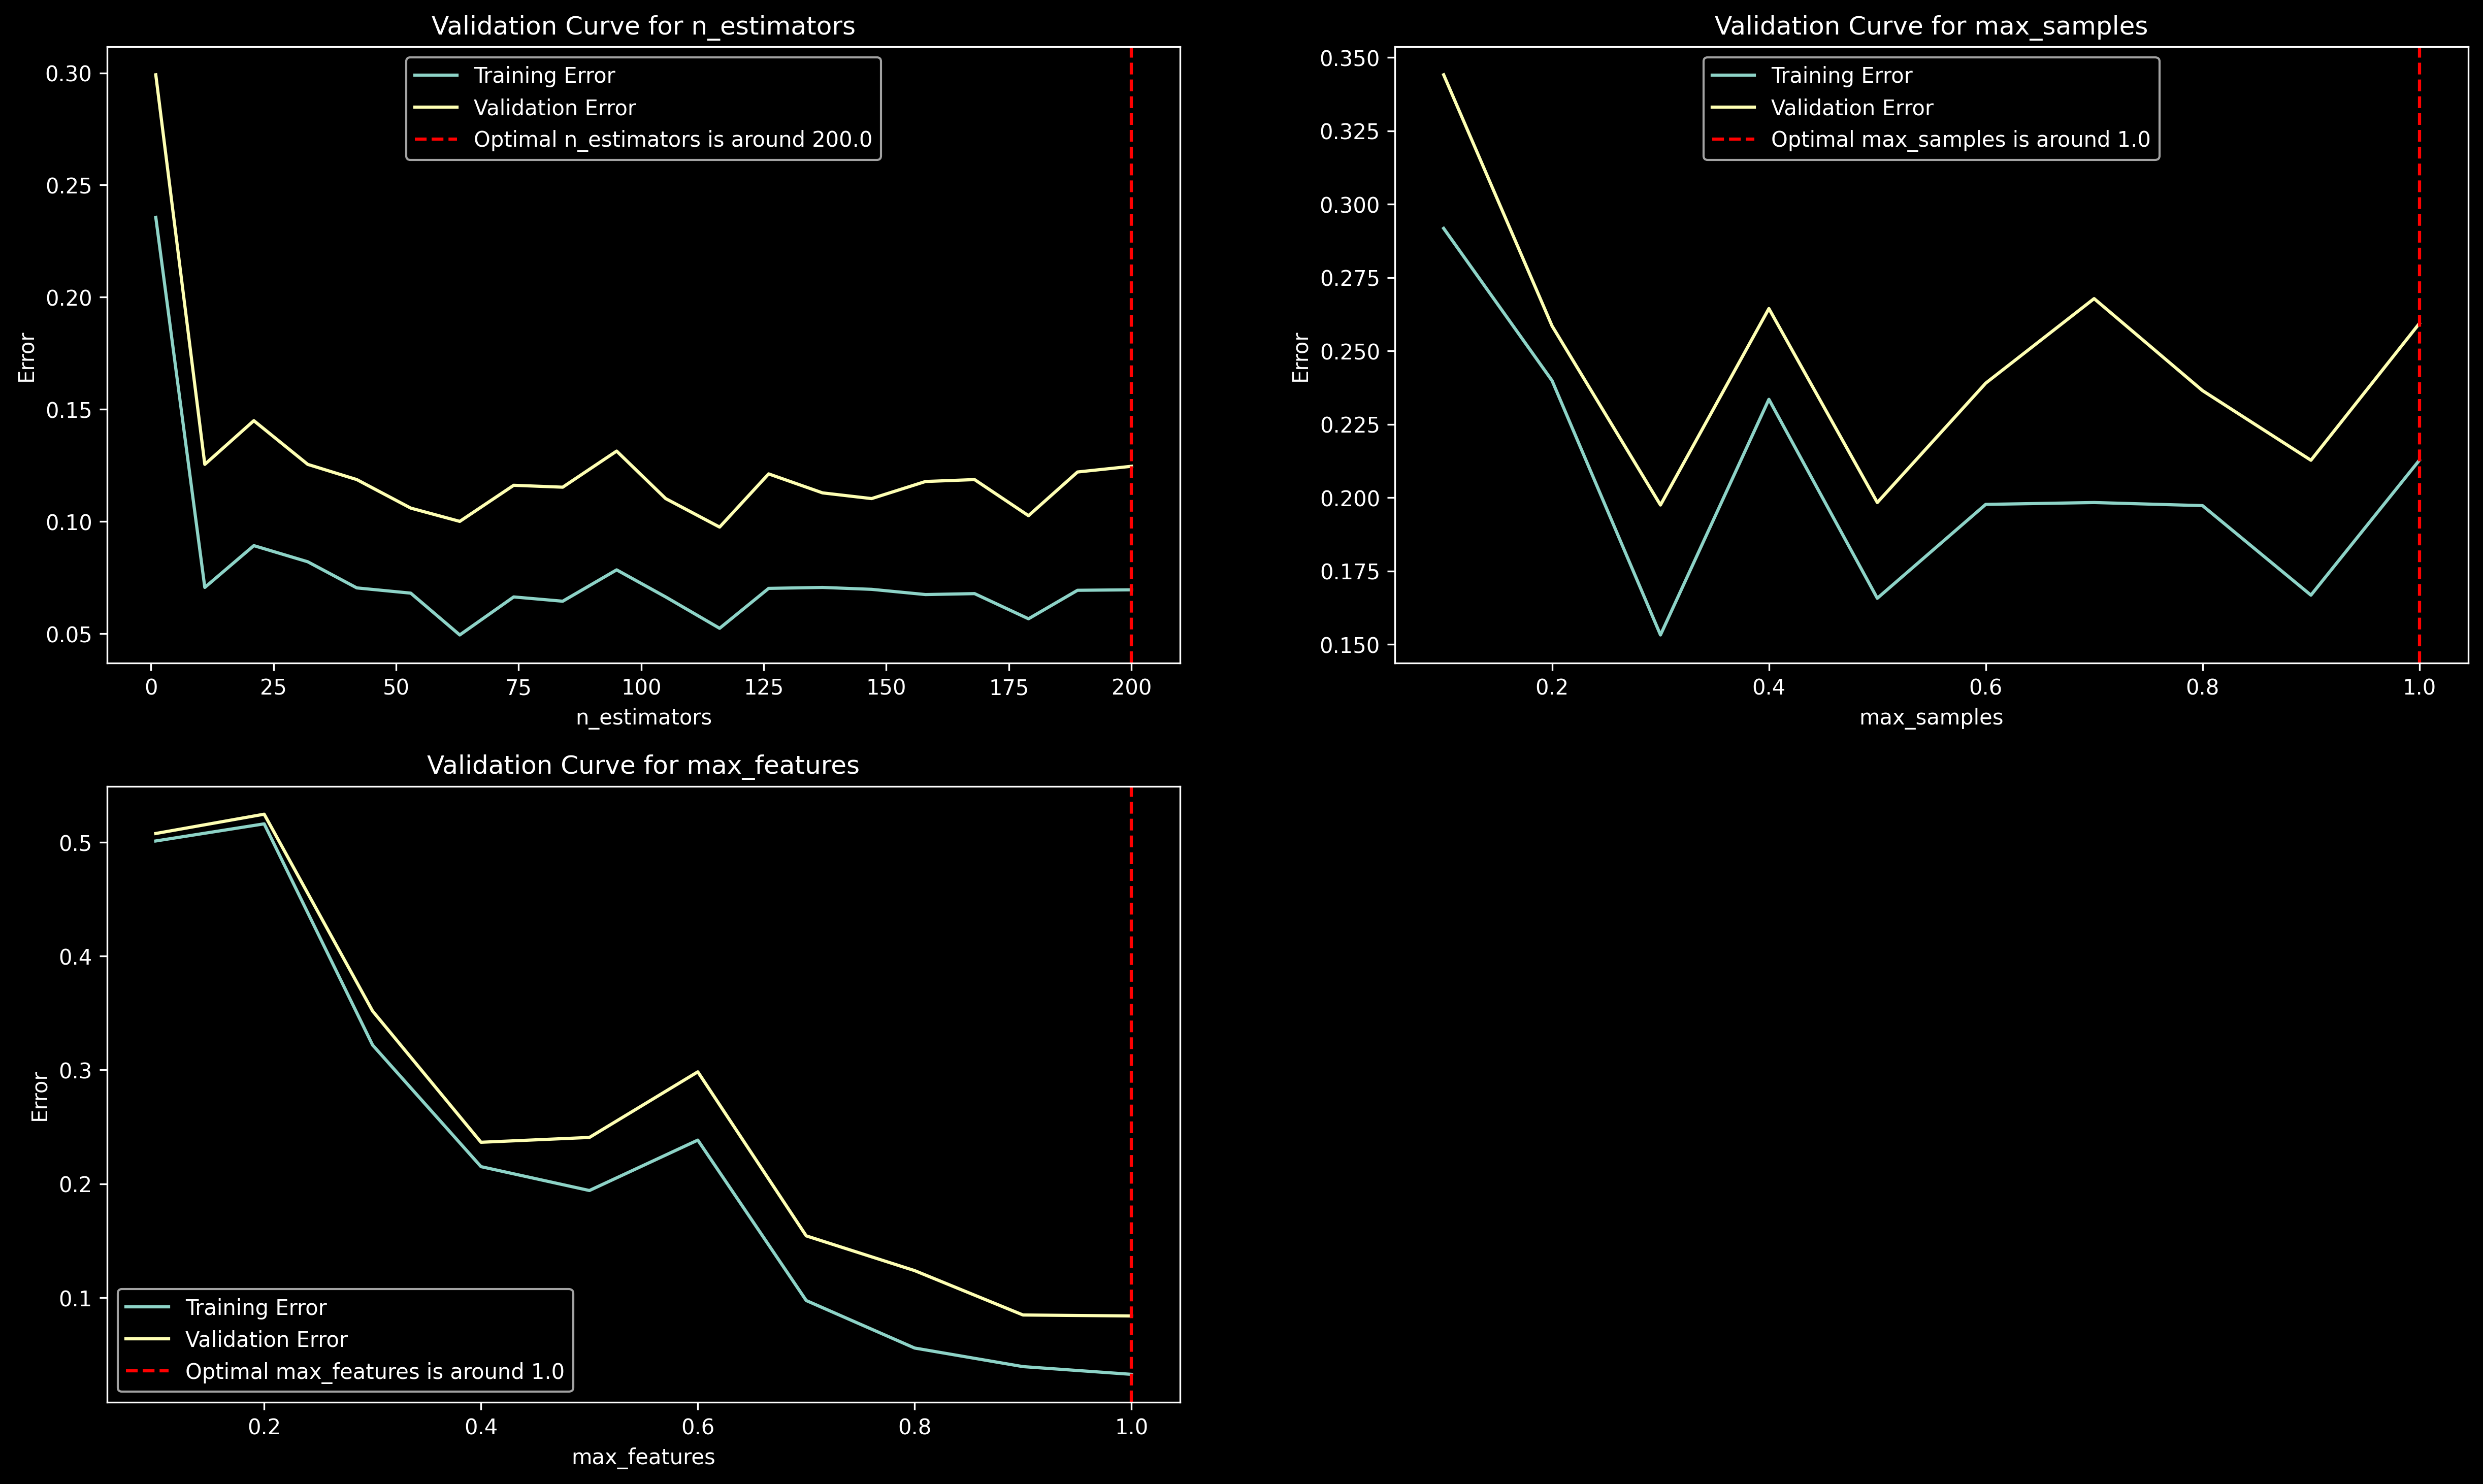

In [26]:
hyperparameters = {
    "n_estimators": np.linspace(1, 200, 20).astype(int),
    "max_samples": np.linspace(0.1, 1, 10),
    "max_features": np.linspace(0.1, 1, 10)
}
validation_curves(clf,x_data_d,y_data_d,5,hyperparameters)